In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



In [2]:
postgres_db = 'studentsperformance'
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()

**Task** <br>
1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

In [9]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [19]:
## 
genders = student_df.gender.unique()
print('In genders:')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print(stats.ttest_ind(
                student_df[student_df["gender"]==genders[i]][var], 
                student_df[student_df["gender"]==genders[j]][var]
            ))
            

races = student_df['race/ethnicity'].unique()
print('In race/ethnicity:')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            print("t-test between groups {0} and {1}:".format(races[i], races[j]))
            print(stats.ttest_ind(
                student_df[student_df["race/ethnicity"]==races[i]][var], 
                student_df[student_df["race/ethnicity"]==races[j]][var]
            ))
            
            
parents = student_df['parental level of education'].unique()
print('In parental level of education:')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            print("t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(stats.ttest_ind(
                student_df[student_df["parental level of education"]==parents[i]][var], 
                student_df[student_df["parental level of education"]==parents[j]][var]
            ))

In genders:
------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)
In race/ethnicity:
------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.73156698

Ttest_indResult(statistic=2.6803314684632196, pvalue=0.00771101202367254)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.9998741306804844, pvalue=0.3187519641464658)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=2.1159296639133762, pvalue=0.03508162451719667)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=6.547380937127048, pvalue=2.4076253789515874e-10)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=4.667733097498242, pvalue=4.628198526834338e-06)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-3.1687690632394907, pvalue=0.0016985933135959495)
t-test between groups some college and associate's degree:
Ttest_indResult(statistic=-0.7615968643953912, pvalue=0.44670316603036575)
t-test between groups some college and high school:
Ttest_indResult(statistic=4.488520877492127, pvalue=9.2750178026

# Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [20]:
lunches = student_df.lunch.unique()
print('In lunches:')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunches)):
        for j in range(i+1, len(lunches)):
            print("t-test between groups {0} and {1}:".format(lunches[i], lunches[j]))
            print(stats.ttest_ind(
                student_df[student_df["lunch"]==lunches[i]][var], 
                student_df[student_df["lunch"]==lunches[j]][var]
            ))

In lunches:
------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


The lurking variable between lunch and test score is the wealth/income of the family.  In other words, students' test scores are associated with the families' financial. 

# Does the test preparation course seem to have an effect on the exam performances?

In [21]:
tests = student_df['test preparation course'].unique()
print('In test preparation course:')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(tests)):
        for j in range(i+1, len(tests)):
            print("t-test between groups {0} and {1}:".format(tests[i], tests[j]))
            print(stats.ttest_ind(
                student_df[student_df["test preparation course"]==tests[i]][var], 
                student_df[student_df["test preparation course"]==tests[j]][var]
            ))

In test preparation course:
------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


Yes.  Those who completed the test preparation course have significant higher scores in math, reading and writing. 

# Which 2 exam scores are most correlated with each other?

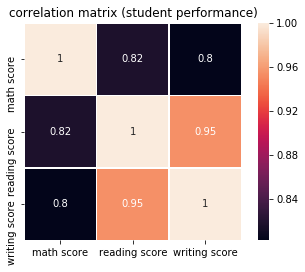

In [23]:
corrmat_student = student_df.corr()
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")
plt.show()

Reading and writing score are strong correlated.